In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
df=pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
missing_values = df.isnull().sum() / len(df)
df.drop(columns=missing_values[missing_values > 0.4].index, inplace=True)
#df.dropna(axis=1, inplace=True)

In [16]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

In [17]:
print(df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', '

In [18]:
X=df[[ 'GrLivArea','BedroomAbvGr', 'FullBath', 'HalfBath']]
y=df['SalePrice']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=40)

In [35]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [37]:
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

In [39]:
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 52043.35730491393
Test RMSE: 46523.75739760064


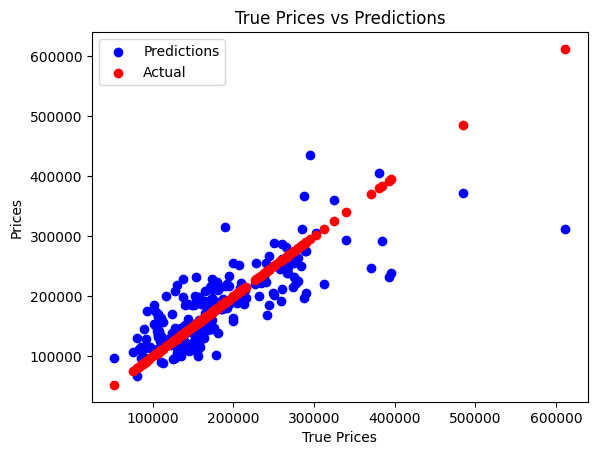

In [40]:
plt.scatter(y_test, test_predictions, color='blue', label='Predictions')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel("True Prices")
plt.ylabel("Prices")
plt.title("True Prices vs Predictions")
plt.legend()
plt.show()

In [41]:
df1=pd.read_csv('/content/test.csv')
missing_values = df1.isnull().sum() / len(df1)
df1.drop(columns=missing_values[missing_values > 0.3].index, inplace=True)

In [ ]:
print(df1.columns.tolist())

['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleCondition']


In [42]:
X_test=df1[['GrLivArea','BedroomAbvGr', 'FullBath', 'HalfBath']]

In [43]:
test_predictions=model.predict(X_test)

In [44]:
print(test_predictions)

[118807.54119865 140775.22514314 205237.12640683 ...  99047.24782317
  99236.30438243 245185.953492  ]


In [47]:
predictions_df = pd.DataFrame({'Id': df1['Id'], 'SalePrice': test_predictions})

predictions_df.to_csv("predictions.csv", index=False)